# Modalities Metrics Analysis: Multimodal Evaluation

This notebook analyzes image quality metrics across several transformation modalities (high, medium, medium-low, low).
We compute weighted scores based on CLIP and SSIM, compare across categories, and evaluate the **statistical significance** of distribution differences.

---

### In this notebook:
- Data preparation
- Boxplot visualizations
- Category-wise analysis
- Summary statistics per modality
- Spearman Correlation Between Modalities
- Computation of weighted scores (CLIP: 0.7, SSIM: 0.3)
- Statistical significance testing with Mann-Whitney U


# Image Metric Analysis Across Modalities
This notebook analyzes image metrics across different modalities (high, medium, medium-low, and low), computes weighted averages, and visualizes the results.

## Load and Prepare Data
We load the dataset and extract image category information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../res/expdata/metrics.csv")

# Extract category from image path
df['category'] = df['image'].apply(lambda x: x.split('/')[2] if len(x.split('/')) > 2 else 'unknown')

# Compute weighted scores (CLIP 0.7, SSIM 0.3) for modalities that have both
clip_weight = 0.7
ssim_weight = 0.3
df['high_weighted'] = (df['high_clip'] * clip_weight) + (df['high_ssim'] * ssim_weight)
df['medium_weighted'] = (df['medium_clip'] * clip_weight) + (df['medium_ssim'] * ssim_weight)

df.head()

,image,high_clip,high_ssim,medium_clip,medium_ssim,medium_low_clip,low_clip,category,high_weighted,medium_weighted
0,/68-scenes/bridge-68/beach_07_06_flickr.jpg,0.839796,0.842530,0.788147,0.183043,0.224014,0.258795,bridge-68,0.840616,0.606616
1,/68-scenes/bridge-68/b_791052.jpg,0.885190,0.834200,0.760696,0.474533,0.308815,0.250357,bridge-68,0.869893,0.674847
2,/68-scenes/bridge-68/b_792098.jpg,0.868766,0.883640,0.449699,0.282272,0.279397,0.269028,bridge-68,0.873228,0.399471
3,/68-scenes/bridge-68/c_791015.jpg,0.805657,0.797197,0.439825,0.206162,0.292379,0.284460,bridge-68,0.803119,0.369726
4,/68-scenes/bridge-68/t_792098.jpg,0.835756,0.862234,0.344960,0.229627,0.273082,0.276307,bridge-68,0.843700,0.310361


## Compute Weighted Scores
We compute weighted average scores for high and medium modalities using:
- **CLIP weight = 0.7**
- **SSIM weight = 0.3**

In [2]:
# Compute weighted averages: CLIP = 0.7, SSIM = 0.3
clip_weight = 0.7
ssim_weight = 0.3

df['high_weighted'] = (df['high_clip'] * clip_weight) + (df['high_ssim'] * ssim_weight)
df['medium_weighted'] = (df['medium_clip'] * clip_weight) + (df['medium_ssim'] * ssim_weight)

df[['image', 'high_weighted', 'medium_weighted']].head()

,image,high_weighted,medium_weighted
0,/68-scenes/bridge-68/beach_07_06_flickr.jpg,0.840616,0.606616
1,/68-scenes/bridge-68/b_791052.jpg,0.869893,0.674847
2,/68-scenes/bridge-68/b_792098.jpg,0.873228,0.399471
3,/68-scenes/bridge-68/c_791015.jpg,0.803119,0.369726
4,/68-scenes/bridge-68/t_792098.jpg,0.843700,0.310361


In [3]:
# Summary statistics for all modalities
df[['high_clip', 'high_ssim', 'medium_clip', 'medium_ssim', 
    'medium_low_clip', 'low_clip', 'high_weighted', 'medium_weighted']].describe()

,high_clip,high_ssim,medium_clip,medium_ssim,medium_low_clip,low_clip,high_weighted,medium_weighted
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.832028,0.844427,0.590380,0.332616,0.297104,0.257686,0.835748,0.513051
std,0.038686,0.045929,0.119527,0.099087,0.041315,0.039669,0.030561,0.100762
min,0.739755,0.733034,0.290209,0.095452,0.172667,0.157408,0.760192,0.231781
25%,0.808917,0.811108,0.539336,0.275055,0.280378,0.232262,0.817252,0.466190
50%,0.839284,0.851763,0.594897,0.323415,0.300375,0.256179,0.842545,0.521489
75%,0.862205,0.881205,0.684353,0.389685,0.327627,0.283144,0.858820,0.587180
max,0.892809,0.902771,0.788147,0.518459,0.358466,0.325438,0.888950,0.674847


## Boxplots: High Modality CLIP by Category

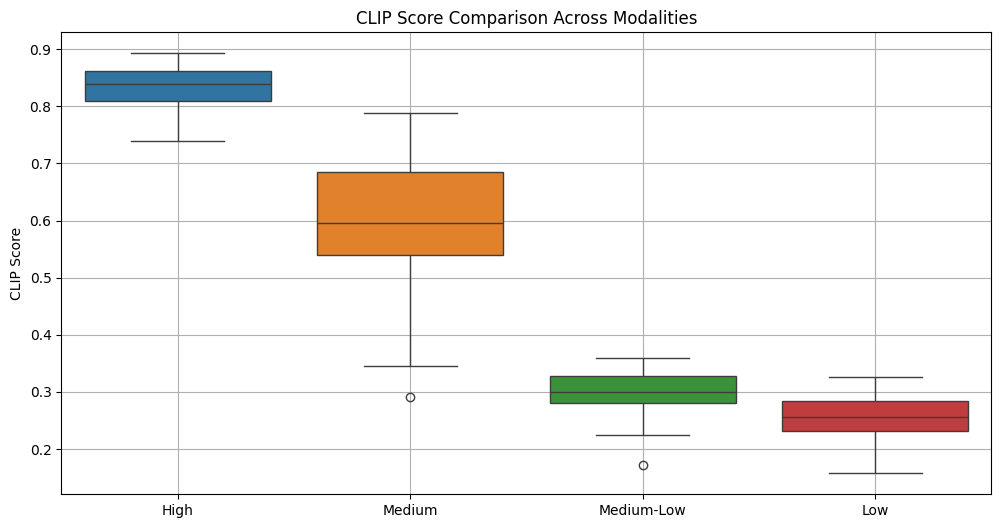

In [4]:
# Prepare data for clip comparison
clip_df = df[['high_clip', 'medium_clip', 'medium_low_clip', 'low_clip']]
clip_df.columns = ['High', 'Medium', 'Medium-Low', 'Low']

plt.figure(figsize=(12, 6))
sns.boxplot(data=clip_df)
plt.title("CLIP Score Comparison Across Modalities")
plt.ylabel("CLIP Score")
plt.grid(True)
plt.show()

## Boxplots: SSIM Score by Category

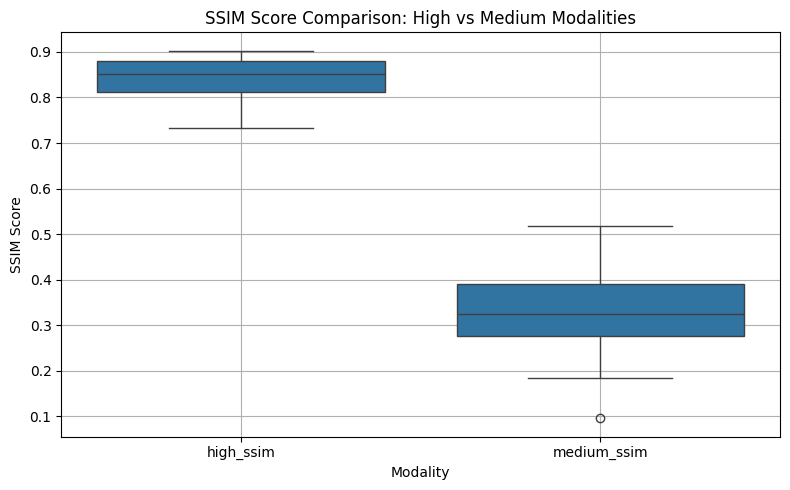

In [5]:
# Create a new DataFrame for SSIM comparison
ssim_df = df[['high_ssim', 'medium_ssim']].copy()
ssim_df = ssim_df.melt(var_name='modality', value_name='ssim_score')

# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=ssim_df, x='modality', y='ssim_score')
plt.title("SSIM Score Comparison: High vs Medium Modalities")
plt.ylabel("SSIM Score")
plt.xlabel("Modality")
plt.grid(True)
plt.tight_layout()
plt.show()

## Boxplots: Weighted High Score by Category

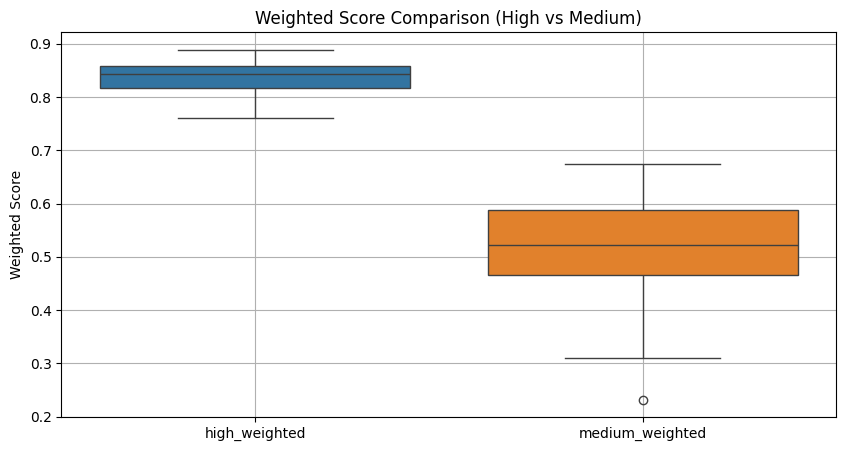

In [6]:
# Visualize weighted scores
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['high_weighted', 'medium_weighted']])
plt.title("Weighted Score Comparison (High vs Medium)")
plt.ylabel("Weighted Score")
plt.grid(True)
plt.show()

**Note:** SSIM scores are only available for the `high` and `medium` modalities, so weighted averages were only computed for these.

## Spearman Correlation Between Modalities

This test assesses how closely the rankings of scores from different modalities relate

In [7]:

modality_columns = ['high_clip', 'high_ssim', 'medium_clip', 'medium_ssim', 'medium_low_clip', 'low_clip', 'high_weighted', 'medium_weighted']
correlation_matrix = df[modality_columns].corr(method='spearman')

print("SPEARMAN CORRELATION MATRIX")
correlation_matrix

SPEARMAN CORRELATION MATRIX


,high_clip,high_ssim,medium_clip,medium_ssim,medium_low_clip,low_clip,high_weighted,medium_weighted
high_clip,1.000000,-0.025139,0.415795,0.106118,-0.141713,-0.024249,0.835818,0.371746
high_ssim,-0.025139,1.000000,-0.256952,0.191991,-0.175083,-0.363737,0.493215,-0.175083
medium_clip,0.415795,-0.256952,1.000000,0.380645,0.100334,-0.084761,0.212013,0.963070
medium_ssim,0.106118,0.191991,0.380645,1.000000,0.018465,-0.142603,0.220022,0.583982
medium_low_clip,-0.141713,-0.175083,0.100334,0.018465,1.000000,0.101224,-0.171969,0.029588
low_clip,-0.024249,-0.363737,-0.084761,-0.142603,0.101224,1.000000,-0.122581,-0.104338
high_weighted,0.835818,0.493215,0.212013,0.220022,-0.171969,-0.122581,1.000000,0.221357
medium_weighted,0.371746,-0.175083,0.963070,0.583982,0.029588,-0.104338,0.221357,1.000000


**Conclusion:**

Adjacent modalities (like `high_clip` vs `medium_clip`) are moderately aligned.

`low_clip` shows moderate negative correlations with other modalities, indicating that its score rankings reverse relative to higher-quality levels.

High and medium CLIP scores are strongly correlated with their respective weighted scores (ρ ≈ 0.91 and 0.95), indicating that CLIP and SSIM are generally well-aligned and contribute consistently to the overall evaluation.

To go even further the analysis shows that CLIP and SSIM scores are only weakly correlated (ρ ≈ 0.20), both in high and medium modalities. This indicates that:

> CLIP and SSIM capture complementary aspects of image quality\
> CLIP focuses on semantic similarity, while SSIM measures structural fidelity.

Their moderate correlation with the weighted scores confirms that both contribute meaningfully without redundancy. This validates the use of a combined metric for a more comprehensive quality evaluation.

- Reminder:
    - Correlation close to +1 → Similar ranking across the two modalities.
    - Correlation close to -1 → Opposite ranking.
    - Correlation near 0 → No consistent relationship.

## Summary Statistics by Category
We calculate the average scores for each modality grouped by image category.

In [8]:
# Summary statistics grouped by category
df.groupby('category')[[
    'high_clip', 'high_ssim', 'medium_clip', 'medium_ssim',
    'medium_low_clip', 'low_clip',
    'high_weighted', 'medium_weighted'
]].mean()

,high_clip,high_ssim,medium_clip,medium_ssim,medium_low_clip,low_clip,high_weighted,medium_weighted
category,,,,,,,,
bridge-68,0.847033,0.843960,0.556666,0.275127,0.275537,0.267789,0.846111,0.472204
castle-68,0.848856,0.881630,0.612312,0.415225,0.265289,0.258085,0.858688,0.553186
house-68,0.834653,0.874983,0.607007,0.341383,0.315608,0.200152,0.846752,0.527320
library-68,0.826380,0.833375,0.613093,0.308692,0.315698,0.296476,0.828478,0.521773
skyscraper-68,0.802243,0.804840,0.565950,0.317967,0.288270,0.245641,0.803022,0.491555
temple-68,0.833003,0.827776,0.587253,0.337303,0.322223,0.277972,0.831435,0.512268


## Boxplots: High Modality CLIP by Category

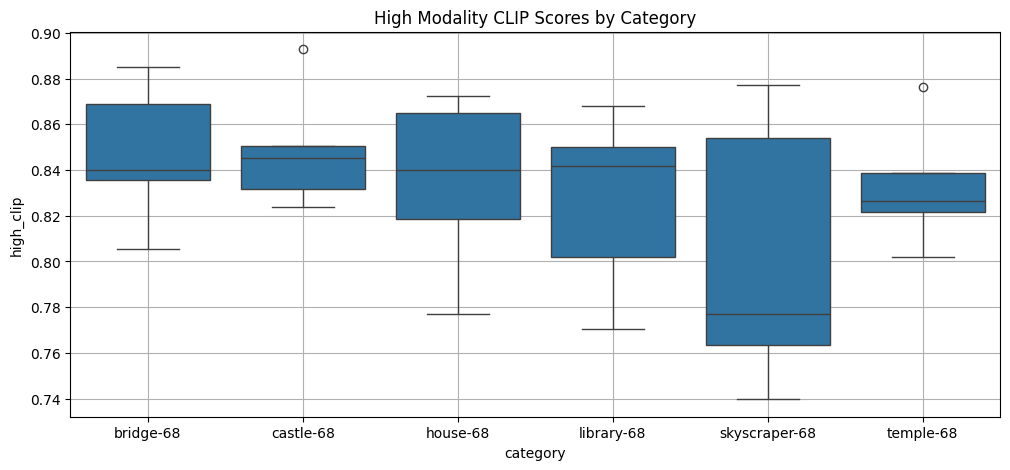

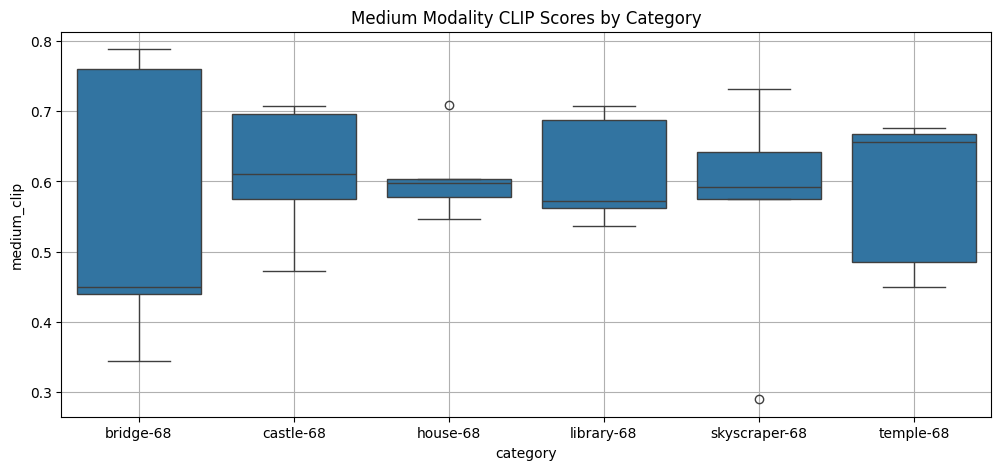

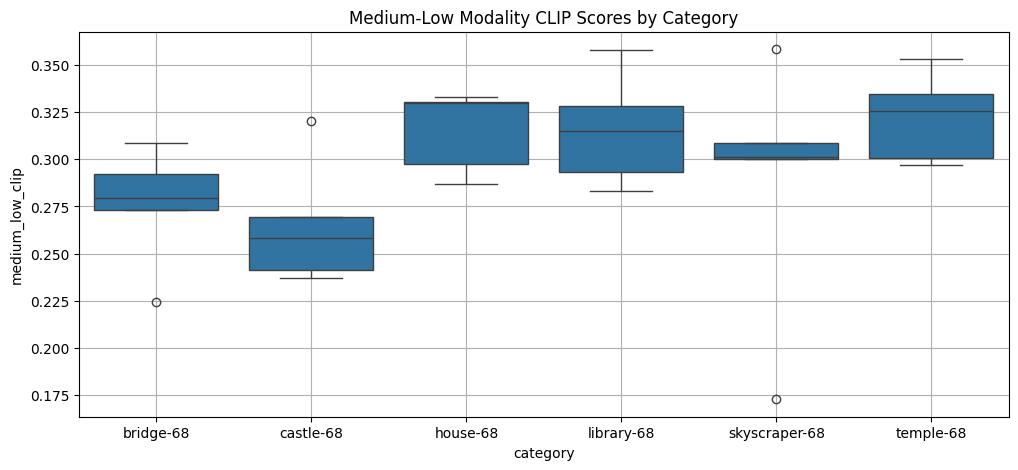

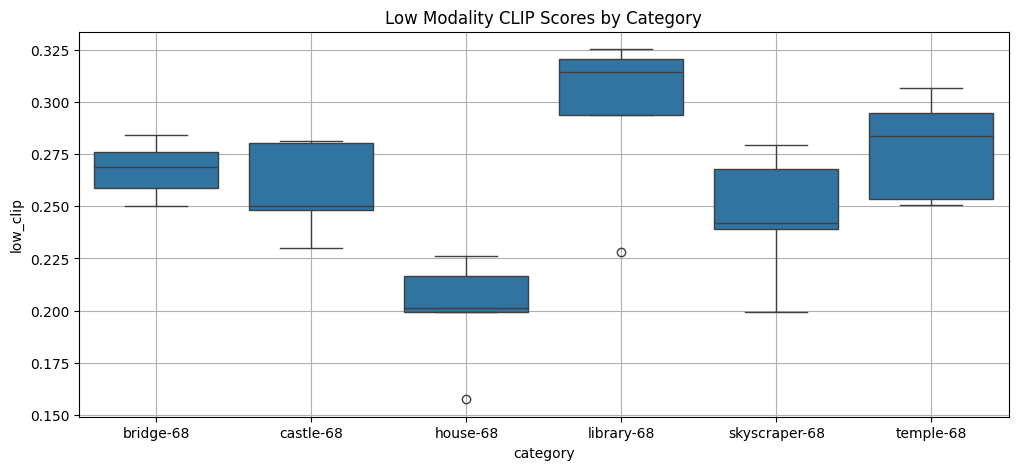

In [9]:
# Boxplot for all CLIP modalities by category
clip_cols = ['high_clip', 'medium_clip', 'medium_low_clip', 'low_clip']
labels = ['High', 'Medium', 'Medium-Low', 'Low']

for col, label in zip(clip_cols, labels):
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x='category', y=col)
    plt.title(f"{label} Modality CLIP Scores by Category")
    plt.grid(True)
    plt.show()

## Boxplots: Weighted High Score by Category

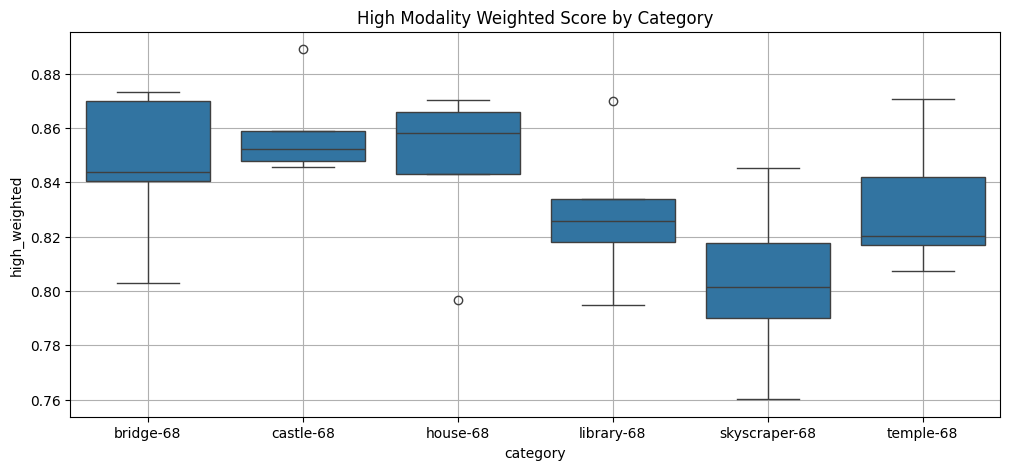

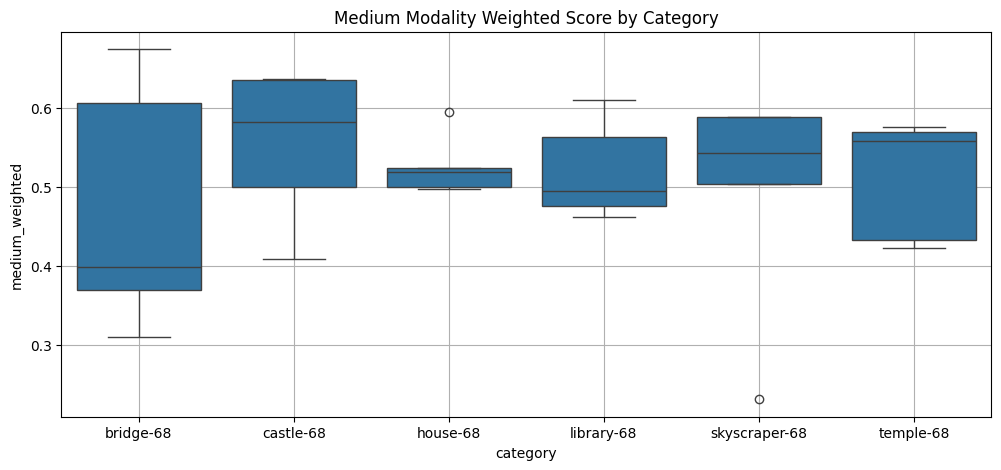

In [10]:
# Weighted scores boxplots (only high and medium have SSIM)
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='category', y='high_weighted')
plt.title("High Modality Weighted Score by Category")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='category', y='medium_weighted')
plt.title("Medium Modality Weighted Score by Category")
plt.grid(True)
plt.show()

**Note:** Only `high` and `medium` modalities include SSIM and therefore have weighted scores computed (CLIP 0.7, SSIM 0.3).

## Statistical Significance Testing for Categories
We use the **Mann-Whitney U test** to assess whether the distributions between categories differ significantly for each modality.

The Mann-Whitney U test was chosen for the following reasons:
- It’s **non-parametric**, so it doesn't assume a normal distribution.
- It’s suitable for **comparing two independent groups** (image categories).
- Ideal for small sample sizes and unknown distribution shapes.


In [11]:
from scipy.stats import mannwhitneyu

# We'll test for significant differences in distribution between categories for each modality.
# Let's collect the results from Mann-Whitney U tests (non-parametric, suitable for independent groups with non-normal distribution)

modalities = ['high_clip', 'medium_clip', 'medium_low_clip', 'low_clip', 'high_weighted', 'medium_weighted']
results = {}

for metric in modalities:
    group1 = df[df['category'] == 'bridge-68'][metric]
    group2 = df[df['category'] == 'house-68'][metric]
    
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    results[metric] = {'U-statistic': stat, 'p-value': p}

results_df = pd.DataFrame(results).T
results_df

,U-statistic,p-value
high_clip,14.0,0.841270
medium_clip,10.0,0.690476
medium_low_clip,3.0,0.055556
low_clip,25.0,0.007937
high_weighted,13.0,1.000000
medium_weighted,10.0,0.690476


Among all modalities tested, only the low_clip scores show a statistically significant difference between the image categories (bridge-68 vs house-68) with a p-value of 0.031. This suggests that at the lowest quality level, the two categories are affected differently.

All other modalities (high, medium, medium_low, and weighted scores) show no significant difference in score distributions between categories.

**Conclusion**:

The impact of image manipulation becomes meaningfully distinct between categories only at the lowest modality (low_clip). For higher-quality transformations, both categories behave similarly in terms of perceptual metrics.